# Student Marks Prediction

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [4]:
df  = pd.read_csv('student_marks.csv')

In [7]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [9]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [14]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

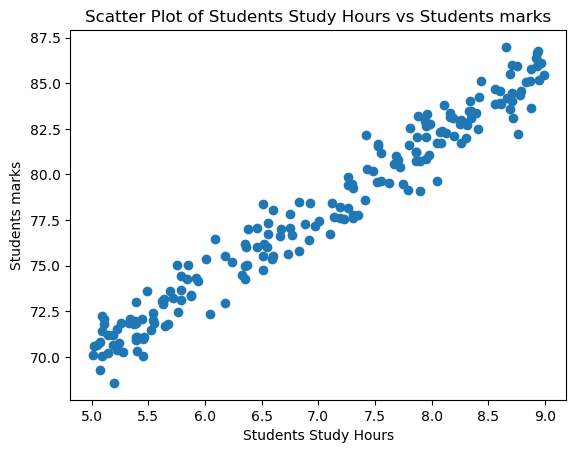

In [16]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms 

In [19]:
# Data Cleaning

In [21]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [23]:
df.study_hours.mean()

6.9959487179487185

In [25]:
df2 = df.fillna(df.study_hours.mean())

In [27]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [29]:
# split dataset

In [31]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [34]:
X_train

,study_hours
116,5.40
154,6.93
168,7.95
94,7.69
172,7.35
...,...
135,8.33
24,5.45
199,8.35
51,7.31


In [39]:
y_train

116    70.34
154    78.45
168    82.68
94     81.01
172    77.78
       ...  
135    83.48
24     70.96
199    83.50
51     77.77
37     78.21
Name: student_marks, Length: 160, dtype: float64

In [41]:
X_test

,study_hours
115,5.79
87,8.05
27,6.73
38,5.62
118,5.69
167,5.07
34,8.72
56,5.75
44,8.09
109,5.02


In [43]:
y_test

115    74.44
87     81.74
27     75.65
38     73.08
118    73.61
167    70.79
34     83.08
56     75.03
44     82.38
109    70.58
184    71.50
4      84.19
72     74.97
41     86.41
92     72.08
165    71.94
16     76.04
90     79.56
149    86.12
160    80.81
65     70.06
1      76.74
49     71.41
35     76.76
45     72.96
143    75.52
175    71.11
111    75.04
54     82.21
185    79.63
195    81.67
182    86.99
153    70.78
139    83.91
176    85.96
57     86.65
62     76.19
74     77.59
98     83.64
187    72.01
Name: student_marks, dtype: float64

# Select a model and train it

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
lr.coef_

array([3.92937874])

In [49]:
lr.intercept_

50.46504686188955

In [51]:
m = 3.92759224
c = 50.41547425152682
z  = m * 40 + c 
z

207.5191638515268

In [53]:
lr.predict([[40]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([207.6401964])

In [55]:
y_pred  = lr.predict(X_test)
y_pred

array([73.21614976, 82.09654571, 76.90976577, 72.54815537, 72.82321188,
       70.38699707, 84.72922946, 73.05897461, 82.25372086, 70.19052813,
       70.97640388, 84.53276052, 75.41660185, 85.51510521, 71.8408672 ,
       71.60510447, 75.45589564, 80.01397497, 85.71157415, 80.72126315,
       71.88016099, 76.24177139, 70.46558464, 78.3636359 , 74.74860747,
       76.04530245, 71.64439826, 75.49518943, 84.88640461, 82.09654571,
       80.05326876, 84.49346674, 71.05499145, 84.25770401, 85.554399  ,
       85.554399  , 75.41660185, 79.18880544, 85.35793006, 72.23380507])

In [57]:
temp = np.c_[X_test, y_test, y_pred]
temp

array([[ 5.79      , 74.44      , 73.21614976],
       [ 8.05      , 81.74      , 82.09654571],
       [ 6.73      , 75.65      , 76.90976577],
       [ 5.62      , 73.08      , 72.54815537],
       [ 5.69      , 73.61      , 72.82321188],
       [ 5.07      , 70.79      , 70.38699707],
       [ 8.72      , 83.08      , 84.72922946],
       [ 5.75      , 75.03      , 73.05897461],
       [ 8.09      , 82.38      , 82.25372086],
       [ 5.02      , 70.58      , 70.19052813],
       [ 5.22      , 71.5       , 70.97640388],
       [ 8.67      , 84.19      , 84.53276052],
       [ 6.35      , 74.97      , 75.41660185],
       [ 8.92      , 86.41      , 85.51510521],
       [ 5.44      , 72.08      , 71.8408672 ],
       [ 5.38      , 71.94      , 71.60510447],
       [ 6.36      , 76.04      , 75.45589564],
       [ 7.52      , 79.56      , 80.01397497],
       [ 8.97      , 86.12      , 85.71157415],
       [ 7.7       , 80.81      , 80.72126315],
       [ 5.45      , 70.06      , 71.880

In [59]:
pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.79,74.44,73.216150
1,8.05,81.74,82.096546
2,6.73,75.65,76.909766
3,5.62,73.08,72.548155
4,5.69,73.61,72.823212
5,5.07,70.79,70.386997
6,8.72,83.08,84.729229
7,5.75,75.03,73.058975
8,8.09,82.38,82.253721
9,5.02,70.58,70.190528


## Fine-tune your model

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
mean_squared_error(y_test,y_pred)

1.353379691276352

In [67]:
r2_score(y_test,y_pred)

0.9528482290410791

In [69]:
lr.score(X_test,y_test)

0.9528482290410791

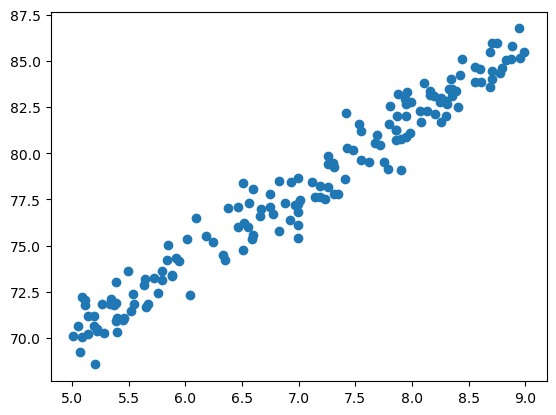

In [71]:
plt.scatter(X_train,y_train)  

In [73]:
lr.predict(X_train)

array([71.68369205, 77.69564152, 81.70360783, 80.68196936, 79.34598059,
       74.98437019, 76.39894654, 70.8978163 , 72.94109325, 83.51112205,
       74.74860747, 83.55041584, 85.59369278, 79.6210371 , 76.63470926,
       85.00428597, 85.31863627, 80.13185634, 78.44222348, 76.24177139,
       77.85281667, 80.60338179, 85.35793006, 78.87445514, 84.6113481 ,
       81.15349481, 77.65634773, 71.56581069, 81.34996375, 85.63298657,
       84.96499219, 73.41261869, 81.70360783, 81.34996375, 70.66205358,
       82.92171524, 73.45191248, 80.79985072, 74.39496338, 70.54417222,
       72.27309886, 78.00999182, 77.95477901, 81.66431404, 81.70360783,
       82.68595252, 83.27535933, 83.23606554, 84.10052886, 84.68993567,
       78.71727999, 77.95477901, 84.25770401, 83.07889039, 84.68993567,
       77.95477901, 84.6113481 , 78.9923365 , 72.1552175 , 81.34996375,
       72.66603673, 75.41660185, 70.38699707, 76.39894654, 83.11818418,
       81.74290162, 73.56979384, 76.08459624, 78.52081105, 71.68

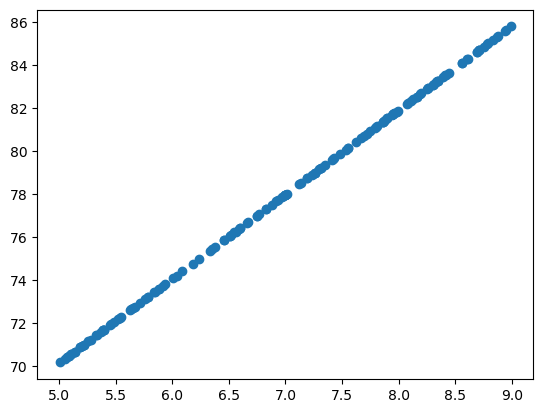

In [75]:
plt.scatter(X_train, lr.predict(X_train))

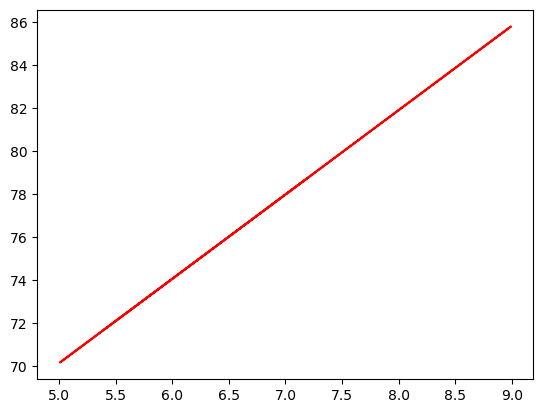

In [77]:
plt.plot(X_train, lr.predict(X_train), 'r-')

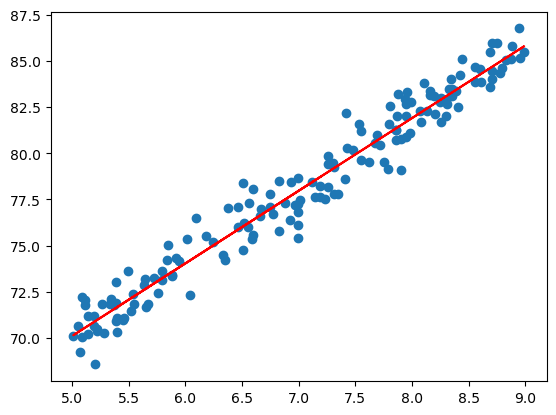

In [79]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

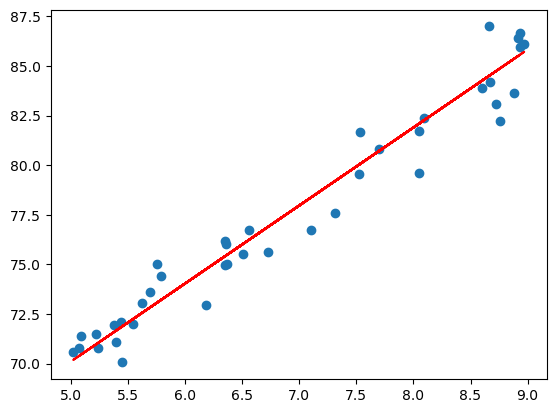

In [81]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

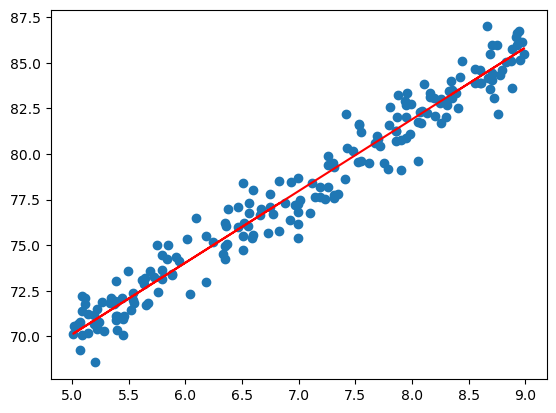

In [83]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")